In [1]:
INPUT_FILE = "day10.txt"

In [2]:
with open(INPUT_FILE) as f:
    lines = [s.strip() for s in f.readlines()]

# Part 1

In [3]:
class MovingPoint(object):
    def __init__(self, x, y, x_v, y_v):
        self.x = x
        self.y = y
        self.x_v = x_v
        self.y_v = y_v
        
    def move(self, n=1):
        """Move a single step, determined by velocity"""
        self.x += n*self.x_v
        self.y += n*self.y_v
        
    def copy(self):
        return MovingPoint(self.x, self.y, self.x_v, self.y_v)
        
    def __str__(self):
        return "MovingPoint({}, {}, {}, {})".format(self.x, self.y, self.x_v, self.y_v)

In [4]:
def parse(s):
    s_idx = s.index(" velocity")
    position_str = s[:s_idx]
    velocity_str = s[s_idx + 1:]
    x, y = map(int, position_str[position_str.index("<") + 1: position_str.index(">")].split(","))
    xv, yv = map(int, velocity_str[velocity_str.index("<") + 1: velocity_str.index(">")].split(","))
    
    return MovingPoint(x, y, xv, yv)

In [5]:
mps = [parse(s) for s in lines]

In [6]:
min_x, min_y = min(p.x for p in mps), min(p.y for p in mps)
max_x, max_y = max(p.x for p in mps), max(p.y for p in mps)

In [7]:
min_x, min_y, max_x, max_y 

(-50263, -50246, 50607, 50573)

In [8]:
MIN_N, MAX_N = -75000, 75000

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from time import sleep

In [10]:
def get_xy(points):
    x = [p.x for p in points]
    y = [-p.y for p in points]
    return x, y

def draw(x, y, ax):
    ax.set_xdata(x)
    ax.set_ydata(y)

In [11]:
from IPython.display import clear_output

This solution was found iteratively

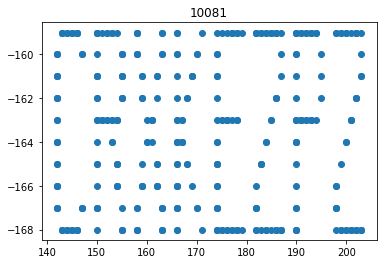

In [12]:
points_to_draw = [p.copy() for p in mps]
speed = 1000
n = 240
iterations = 0
pause_time = 0.25

for i in range(n):
    plt.clf()
    x, y = get_xy(points_to_draw)
    plt.scatter(x, y)
    plt.title("{}".format(iterations))
    plt.pause(pause_time)
    
    clear_output(wait=True)
    
    for p in points_to_draw:
        p.move(speed)
        
    iterations += speed
    
    if iterations >= 10000:
        speed = 10
    if iterations >= 10075:
        speed = 1
        pause_time = 0.5
    if iterations >= 10082:
        break

In [21]:
def show_at(starting, n):
    starting = [p.copy() for p in starting]
    for p in starting:
        p.move(n)
    x, y = get_xy(starting)
    plt.scatter(x, y)

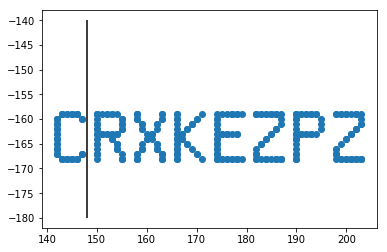

In [24]:
show_at(mps, 10081)
plt.vlines(148, -180, -140)

# Part 2

In [15]:
10081

10081